In [9]:
for i in range(4):
    print(i*450, i*450+450)
        # rppg_clip = rppg_pred[i:i+450]
        

0 450
450 900
900 1350
1350 1800


142.44604316546764
157.50000000000003
108.43373493975905
102.85714285714288


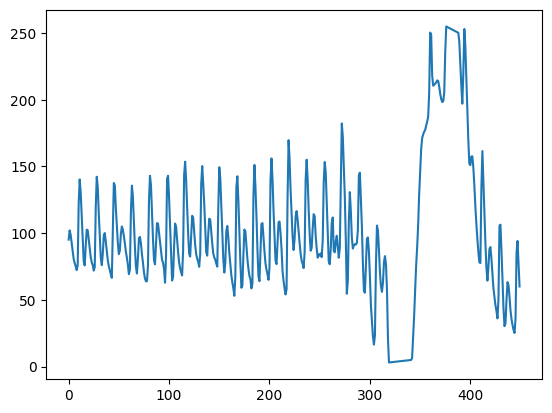

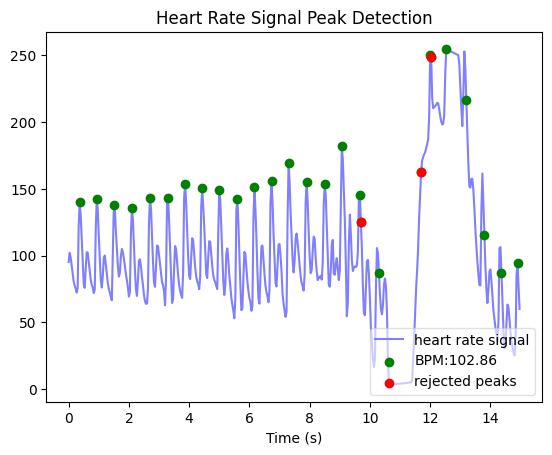

In [2]:
import scipy.io as sio
import heartpy as hp
rppg_pred = sio.loadmat("/big_data1/MMPD/subject1/p1_13.mat")['GT_ppg'][0]
for i in range(4):
        rppg_clip = rppg_pred[i*450 : i*450+450]
        
        working_data, measures = hp.process(rppg_clip, 30)
        print(measures['bpm'])
import matplotlib.pyplot as plt
plt.plot(rppg_pred[-450:])
hp.plotter(working_data, measures)


In [2]:
import os
import pandas as pd
import heartpy as hp
import scipy.io as sio
import numpy as np
from scipy.signal import welch, butter, lfilter
import json

gold_file_path_list = []
orignal_seq_file_list = []

file_list = os.listdir("/home/dejavu/Code/PhysBench/origin_rppg")

all_gold_list = []
all_origin_pred_list = []

def get_hr(y, sr=30, min=30, max=180):
    p, q = welch(y, sr, nfft=1e5/sr, nperseg=np.min((len(y)-1, 256)))
    return p[(p>min/60)&(p<max/60)][np.argmax(q[(p>min/60)&(p<max/60)])]*60

for _ in file_list:
    subject, subject_num = temp = _[:-4].split('_')
    orignal_seq_file_list.append(os.path.join("/home/dejavu/Code/PhysBench/origin_rppg",_))
    gold_file_path_list.append(os.path.join("/big_data1/MMPD", "subject"+subject[1:], 
                                            subject+"_"+subject_num+".mat"))
print(gold_file_path_list)
for file in orignal_seq_file_list:
    rppg_pred = pd.read_csv(file)[' BVP'].to_list()
    num = 450
    count = len(rppg_pred) // num
    for i in range(count):
        rppg_clip = rppg_pred[i*450 : i*450+450]
        # working_data, measures = hp.process(rppg_clip, 30)
        all_origin_pred_list.append(get_hr(rppg_clip, 30))

for file in gold_file_path_list: 
    rppg_pred = sio.loadmat(file)['GT_ppg'][0]
    for i in range(4):
        rppg_clip = rppg_pred[i*450 : i*450+450]
        all_gold_list.append(get_hr(rppg_clip, 30))
        
with open('gold_data.json', 'w') as file:
    json.dump(all_gold_list, file)
    
with open('origin_pred_data.json', 'w') as file:
    json.dump(all_origin_pred_list, file)

['/big_data1/MMPD/subject16/p16_3.mat', '/big_data1/MMPD/subject27/p27_11.mat', '/big_data1/MMPD/subject26/p26_11.mat', '/big_data1/MMPD/subject18/p18_11.mat', '/big_data1/MMPD/subject1/p1_7.mat', '/big_data1/MMPD/subject1/p1_11.mat', '/big_data1/MMPD/subject7/p7_11.mat', '/big_data1/MMPD/subject33/p33_7.mat', '/big_data1/MMPD/subject12/p12_3.mat', '/big_data1/MMPD/subject11/p11_3.mat', '/big_data1/MMPD/subject8/p8_3.mat', '/big_data1/MMPD/subject20/p20_3.mat', '/big_data1/MMPD/subject1/p1_3.mat', '/big_data1/MMPD/subject20/p20_7.mat', '/big_data1/MMPD/subject2/p2_11.mat', '/big_data1/MMPD/subject22/p22_11.mat', '/big_data1/MMPD/subject31/p31_3.mat', '/big_data1/MMPD/subject21/p21_11.mat', '/big_data1/MMPD/subject20/p20_11.mat', '/big_data1/MMPD/subject6/p6_3.mat', '/big_data1/MMPD/subject15/p15_7.mat', '/big_data1/MMPD/subject33/p33_3.mat', '/big_data1/MMPD/subject10/p10_7.mat', '/big_data1/MMPD/subject18/p18_7.mat', '/big_data1/MMPD/subject19/p19_3.mat', '/big_data1/MMPD/subject24/p2

NameError: name 'np' is not defined

In [5]:
# pd.read_csv("/home/dejavu/Code/PhysBench/origin_rppg/p33_11.csv").keys()

Index(['Timestamp', ' BVP'], dtype='object')

In [12]:
import json

# Open the JSON file in read mode
with open('gold_data.json', 'r') as file:
    # Load the JSON data into a Python object
    all_gold_list = json.load(file)
    

with open('deblur_pred_data.json', 'r') as file:
    # Load the JSON data into a Python object
    all_deblur_list = json.load(file)
    
# Now you can use all_gold_list in your code
print(all_gold_list)

with open('origin_pred_data.json', 'r') as file:
    # Load the JSON data into a Python object
    all_origin_pred_list = json.load(file)

# Now you can use all_gold_list in your code
print(len(all_origin_pred_list))
print(len(all_gold_list))
print(len(all_deblur_list))

def mean_absolute_error(list1, list2):
    # Ensure both lists have the same length
    if len(list1) != len(list2):
        raise ValueError("Lists must have the same length")
    
    # Calculate the absolute differences and compute the mean
    absolute_differences = [abs(a - b) for a, b in zip(list1, list2)]
    mae = sum(absolute_differences) / len(list1)
    
    return mae

print("origin: ", mean_absolute_error(all_gold_list, all_origin_pred_list))

print("deblur: ", mean_absolute_error(all_gold_list, all_deblur_list))
# mae = mean_absolute_error(list1, list2)
# print("Mean Absolute Error:", mae)




[112.87128712871288, 117.1917191719172, 117.73177317731773, 119.8919891989199, 95.04950495049505, 102.07020702070207, 97.20972097209722, 100.45004500450045, 70.74707470747074, 73.44734473447345, 75.06750675067508, 79.92799279927993, 99.9099909990999, 96.66966696669668, 93.96939693969398, 90.18901890189018, 112.87128712871288, 105.85058505850586, 102.07020702070207, 100.45004500450045, 112.33123312331233, 110.17101710171018, 106.93069306930693, 105.85058505850586, 99.36993699369938, 90.18901890189018, 90.18901890189018, 90.72907290729073, 85.32853285328532, 59.94599459945995, 60.486048604860486, 93.96939693969398, 62.64626462646265, 61.566156615661576, 63.72637263726373, 63.18631863186318, 81.54815481548155, 71.28712871287128, 67.50675067506751, 70.20702070207021, 99.36993699369938, 100.99009900990099, 106.3906390639064, 105.31053105310531, 86.40864086408641, 85.86858685868587, 93.42934293429343, 96.12961296129613, 110.17101710171018, 99.9099909990999, 110.17101710171018, 111.2511251125

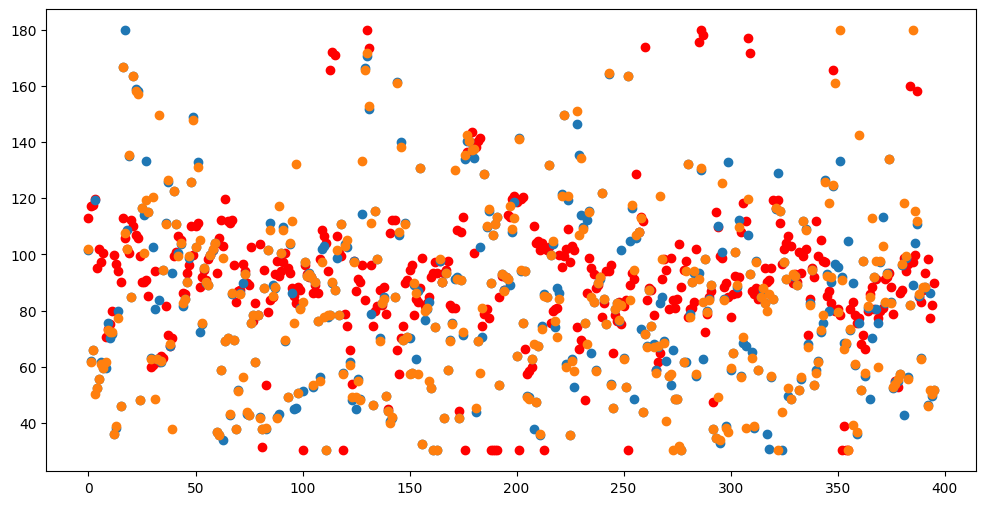

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(range(len(all_gold_list)),  all_gold_list[:100], color='red', marker='o')
plt.scatter(range(len(all_origin_pred_list)), all_origin_pred_list)
plt.scatter(range(len(all_deblur_list)), all_deblur_list)
plt.show()